In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

# 훈련세트와 테스트 세트 2차원 배열로 바꾸기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [6]:
# 결정계수
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)
# 최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)
knr.score(train_input, train_target), knr.score(test_input, test_target)


(0.9804899950518966, 0.9746459963987609)

In [9]:
knr.predict([[50]]) # 무게 예측

array([1033.33333333])

In [10]:
knr.predict([[100]])

array([1033.33333333])

In [11]:
import matplotlib.pyplot as plt

# 해당 샘플의 이웃 구함
distance, indexes = knr.kneighbors([[50]])
print(distance, indexes)

[[6. 7. 7.]] [[34  8 14]]


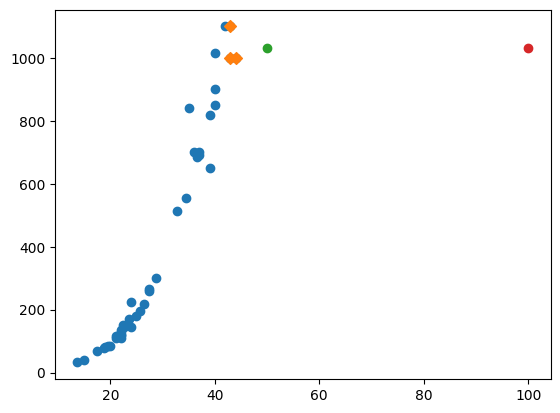

In [12]:
plt.scatter(train_input, train_target)
# 훈련 세트중 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50,1033) # 이 두 샘플의 이웃이 같으므로 샘플의 예측 무게 또한 같게나온다
plt.scatter(100,1033)
plt.show()

In [15]:
# 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

lr.predict([[50],[100]])

array([1241.83860323, 3192.69585141])

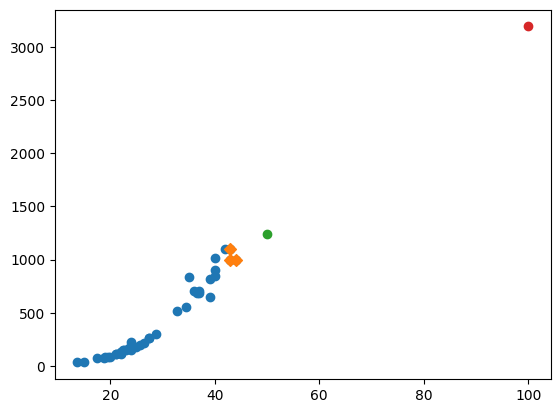

In [16]:
# 단순 선형 회귀 모델
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50,1241)
plt.scatter(100,3192)
plt.show()

In [17]:
# 모델 파라미터 => 머신러닝 알고리즘이 훈련을 통해 찾은 값

#기울기와 절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


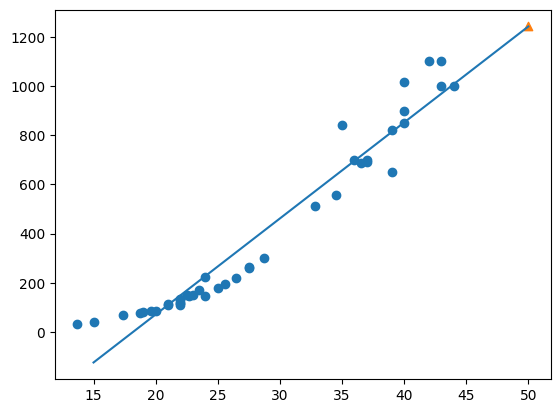

In [19]:
plt.scatter(train_input, train_target)
# 길이 15부터 50까지 1차 방정식 그래프
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm농어데이터
plt.scatter(50,1241.9, marker='^')
# plt.scatter(100,3392, marker='^')
plt.show()

In [20]:
# 전체적으로 과소적합 (둘 다 낮음)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [21]:
#직선보다 더 좋은모델 => 다항회귀 (곡선, 다항식을 사용한 선형회귀)
#길이의 제곱 데이터 만들기 (넘파이 브로드캐스팅 적용)
train_poly = np.column_stack((train_input ** 2 ,  train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [22]:
# 길이 제곱 추가하여 열이 2개로 늘어남
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [24]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.coef_,lr.intercept_)
print(lr.predict([[50**2, 50]]))

[  1.01433211 -21.55792498] 116.0502107827827
[1573.98423528]


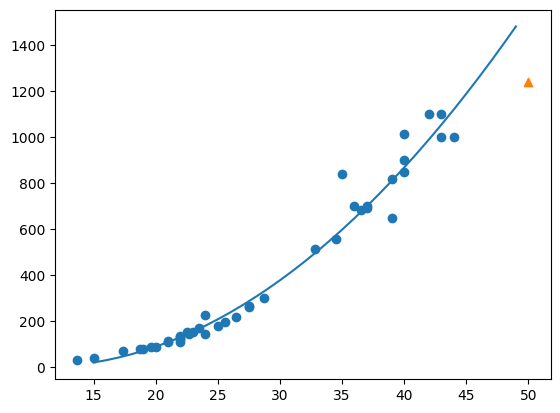

In [25]:
#구간별 직선 위해 15 에서 49까지 정수 배열 만듬
point = np.arange(15,50)

#훈련 세트 산점도
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50,1241.9, marker='^')
plt.show()

In [26]:
pred = lr.coef_[0] * (point ** 2) + lr.coef_[1] * point + lr.intercept_
pred

array([  20.90606071,   30.79243112,   42.70746575,   56.6511646 ,
         72.62352767,   90.62455496,  110.65424646,  132.71260219,
        156.79962213,  182.91530629,  211.05965467,  241.23266727,
        273.43434409,  307.66468513,  343.92369038,  382.21135986,
        422.52769355,  464.87269146,  509.24635359,  555.64867994,
        604.07967051,  654.5393253 ,  707.0276443 ,  761.54462753,
        818.09027497,  876.66458663,  937.26756251,  999.89920261,
       1064.55950693, 1131.24847547, 1199.96610822, 1270.7124052 ,
       1343.48736639, 1418.2909918 , 1495.12328143])

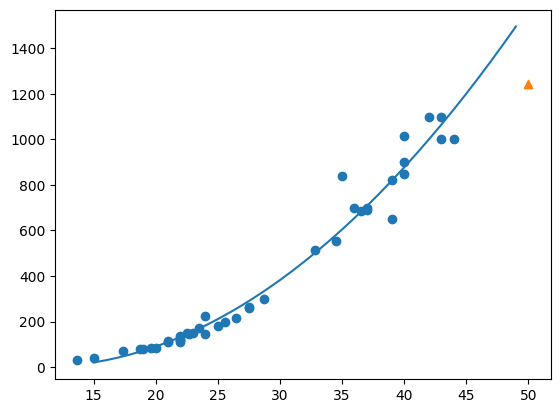

In [27]:
#구간별 직선 위해 15 에서 49까지 정수 배열 만듬
point = np.arange(15,50)

#훈련 세트 산점도
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프
plt.plot(point, pred)

plt.scatter(50,1241.9, marker='^')
plt.show()